In [1]:
import os
import sys
src_path = sys.path[0].replace("scripts", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("scripts", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

from profile_extraction import ProfileExtraction
from data_loader import UCSD_dataloader
from utils.plot_utils import *

g:\Anaconda\Anaconda3\envs\base38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
exp_suffix = "Mar2023"
exp_folder = os.path.join(out_path, "experiments", exp_suffix)
assert os.path.exists(exp_folder)

In [3]:
# load data set
loader = UCSD_dataloader
loaded = loader(tstart=datetime(2019,1,1,0,0), tend=datetime(2020,1,1,0,0), delta=0.25, 
                bld="Hopkins", pv="Hopkins", ev="OSLER", pv_to_bld=0.5, ev_to_bld=0.2, Pmax=10)
data = loaded.get_data()

# extract representative profiles
tstart, tend = datetime(2019, 1, 1, 0, 0), datetime(2020, 1, 1, 0, 0)
pe = ProfileExtraction(data=data, tstart=tstart, tend=tend, rand_seed=2023)


# rp is a [RepProfiles] object, see src/profile/extraction.py
rp = pe.rep_profile_extraction(alg="sample", K=20, incl_ev=True, ev_how_to="unif",
                               dist_metric="l2_center", importance_func=None)

# convert profiles to params -> for battery optimizer
params = rp.profiles_to_params()

In [5]:
folder = os.path.join(exp_folder, "ref_data")
# save the extracted representative profiles to xlsx
suffix = ???    # careful! cover an existing file may make other experiments unrepeatiable
save_fn = f"{suffix}-base_rep_profiles"
rp.save(save_fn=f"{save_fn}.xlsx", save_path=folder)
np.save(os.path.join(folder, f"{save_fn}.npy"), params)

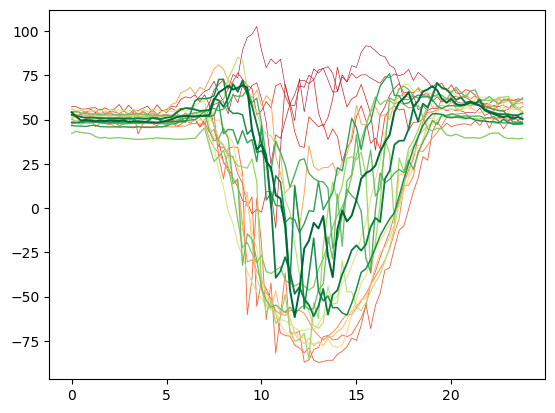

In [4]:
rep_profile_visual(rp.agg_power, rp.prob)